In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from scipy.signal import medfilt
from scipy.stats import sem, ranksums, spearmanr
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set(font_scale=2, style='ticks')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
vol_file = '../Analysis/depreciated/analysis_sections_gain.csv'
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
dat_xls_file = dat_xls_file.reset_index()
t_pre = 100 # time window pre-swim
t_post = 350 # time window post-swim
t_label = np.arange(-t_pre, t_post)/300
t_sig = 240

/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


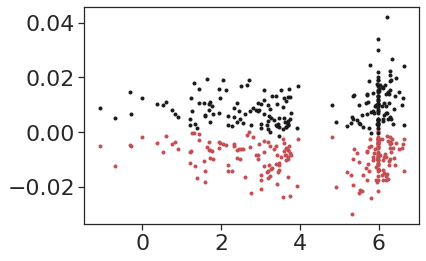

[0.6789894361988539, -0.028586020344375483]
[0.000327632323820682, 0.2444201088325293]


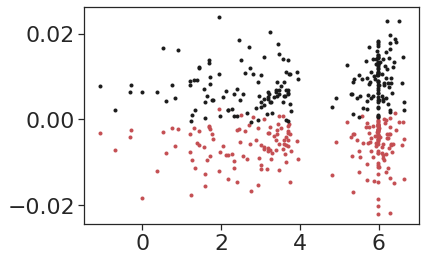

[0.07024102311080122, 0.12458728988350741]
[5.156881747308046e-05, 0.2743147107135751]


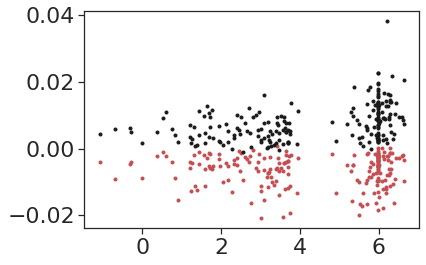

[0.7758169860827198, 0.019672804237526768]
[2.1090112173595584e-09, 0.39668282767348956]


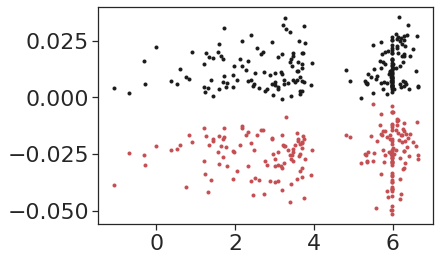

[0.2489512125285493, 0.07952624058707765]
[0.03751904279198025, 0.14297040452185186]


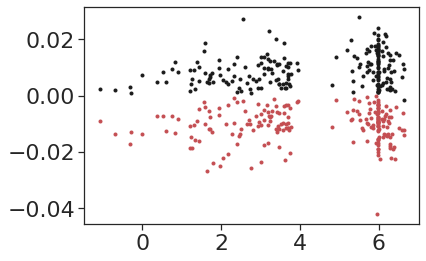

[0.8003519575799816, -0.01747063405767302]
[0.008565741474069782, 0.1801402915295349]


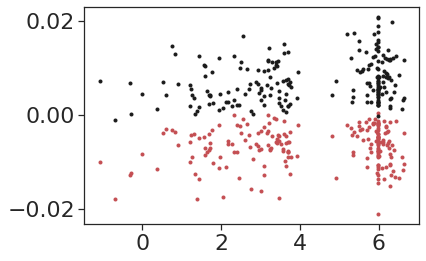

[0.8950247812298124, 0.009115989569220152]
[0.0040307474953896584, 0.1967362288815125]


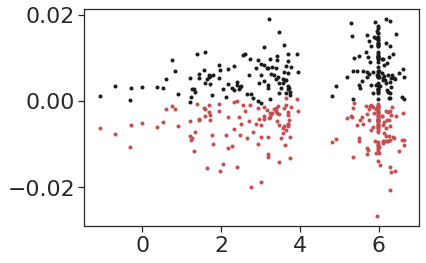

[0.14961107558028558, -0.09930420994328774]
[0.00047263710425428043, 0.2380396718115747]


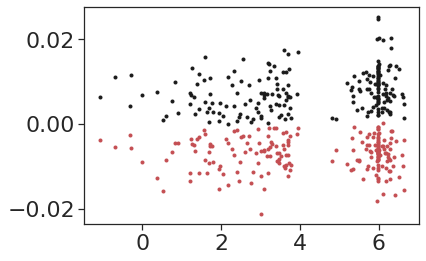

[0.6529948511890651, -0.031055196574059942]
[0.0004164486048324845, 0.2402626231226653]


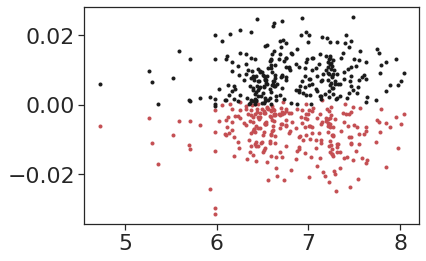

[0.02141441057190933, -0.13971102846378683]
[0.0040135587146051385, 0.17423759952210593]


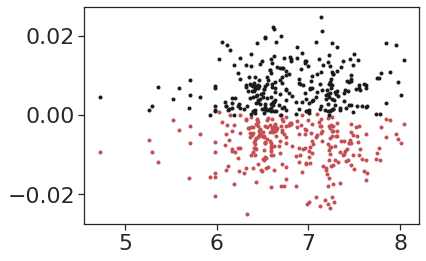

[0.20201411631089217, -0.07774342150583463]
[0.04886352575261072, 0.11977819377791687]


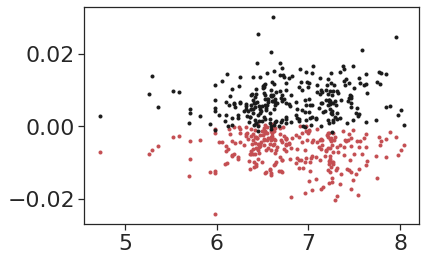

[0.004298551024516023, -0.17294246872851723]
[0.004452651631766803, 0.17227410164998228]


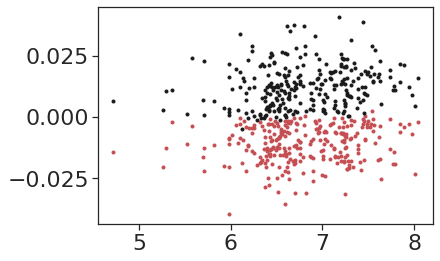

[0.05339214372866364, 0.11748096457699837]
[0.00021737731507598133, 0.2228315339627425]


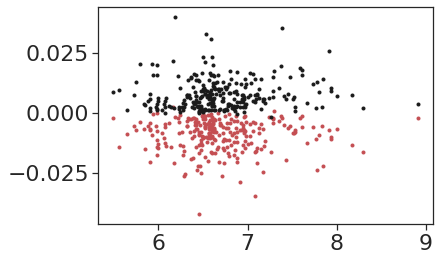

[0.6923975966694436, -0.0246016158098285]
[0.041882769525329856, 0.12604599051032322]


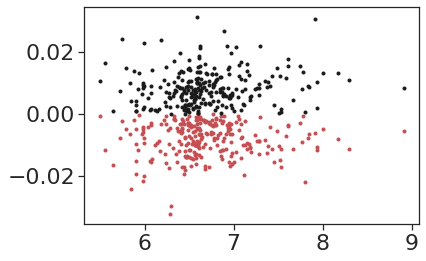

[0.8916617383770562, 0.008471190124256721]
[0.027527097577323523, 0.13643806399794817]


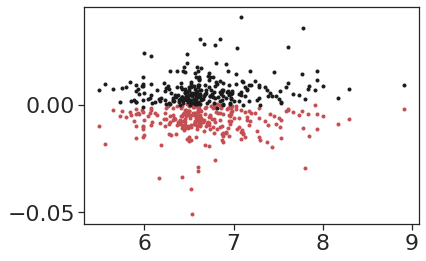

[0.6646554182724377, -0.0269571614662428]
[0.016933092103816903, 0.147720385256579]


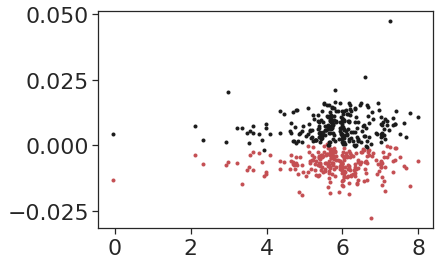

[0.8208412918585364, -0.014482205028397418]
[0.048130991225337344, 0.12588114812844614]


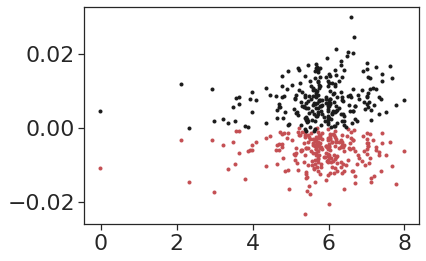

[0.42038550352736703, -0.051496000789967404]
[0.004801382086099932, 0.1788941730347171]


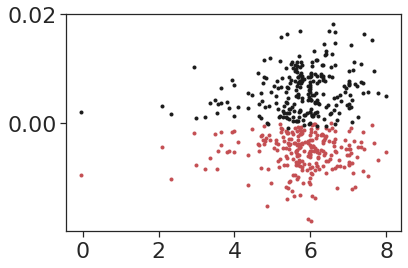

[0.4292829765781201, -0.05051730124196892]
[0.002158565354759477, 0.1943025192952726]


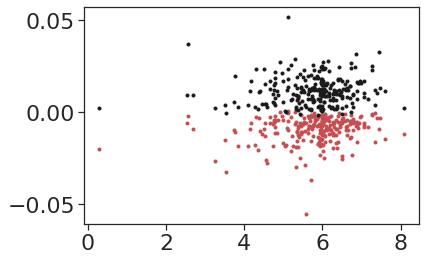

[0.049775811461094666, 0.12548613207778117]
[0.15648637513153582, 0.0908053105288497]


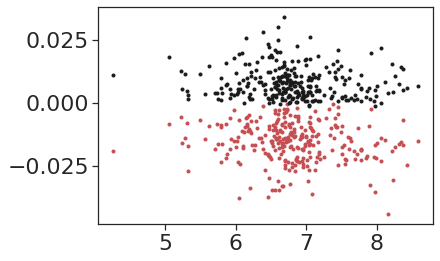

[0.01807568824161672, -0.1419646577511182]
[0.03520799116383545, -0.12659770159072867]


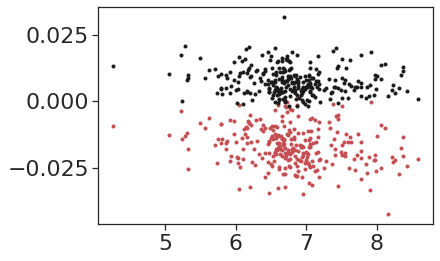

[0.0001320413069940819, -0.22768468634290492]
[0.014408775917991784, -0.14688635216454052]


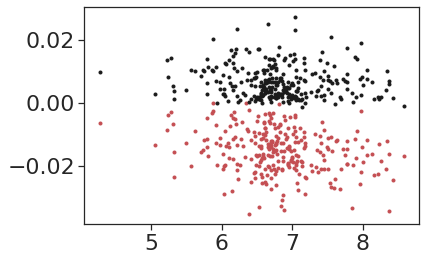

[0.0001269917777010642, -0.22824139056358114]
[0.05288533150612051, -0.11644490717267654]


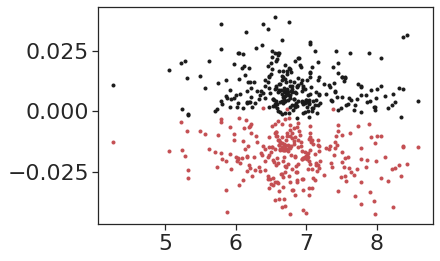

[0.023677344729596, -0.13591318124279417]
[0.03006869762385485, -0.13036646495078305]


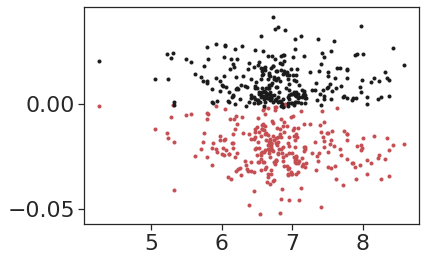

[0.0050874562277202825, -0.16788528053714616]
[0.37179233234242914, -0.053867061742224484]


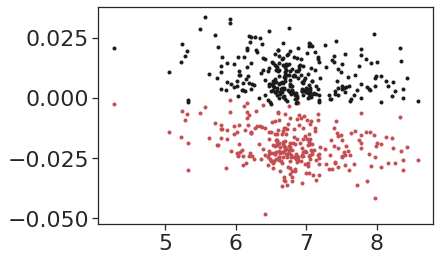

[2.2784663861095277e-05, -0.2515320658243456]
[0.0003546682293968762, -0.2130963256392218]


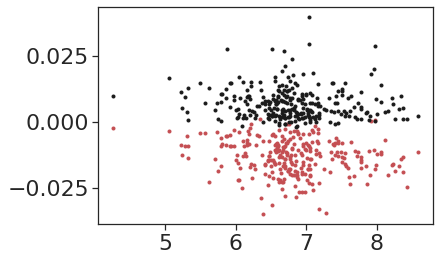

[0.0063478967366972896, -0.16361796765695275]
[0.03665393436542873, -0.1256220576826876]


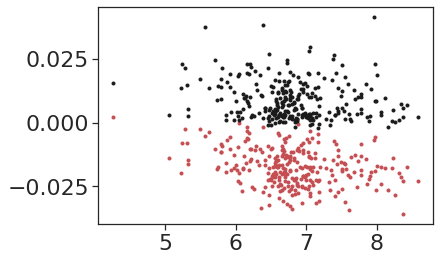

[9.082719099009033e-06, -0.2631257417547362]
[0.008743119019075369, -0.1572666839060536]


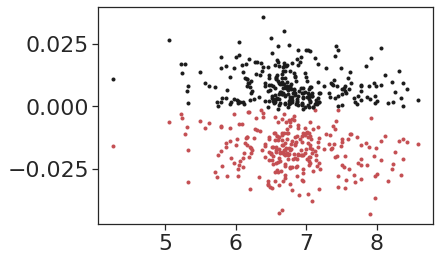

[0.01775790382341503, -0.142354802392586]
[0.01124432819328869, -0.15211462912545493]


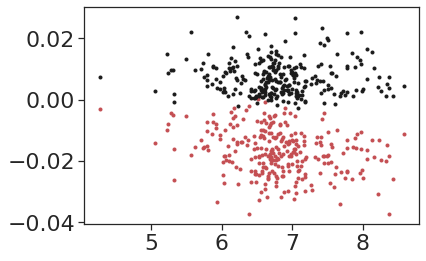

[8.480966714869346e-05, -0.23392700060638977]
[0.4965099032703023, -0.041025035880885616]


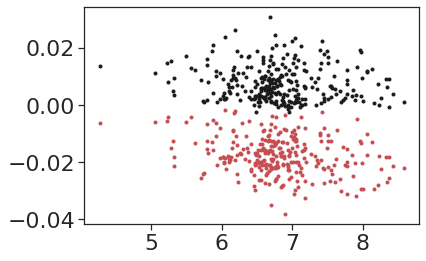

[0.00025931066173525655, -0.2178243592537679]
[0.07560319833685655, -0.10693407289550559]


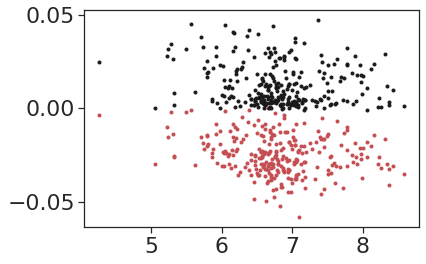

[0.0019772288473617716, -0.18510641180980814]
[0.022325613645860318, -0.13724961013766288]


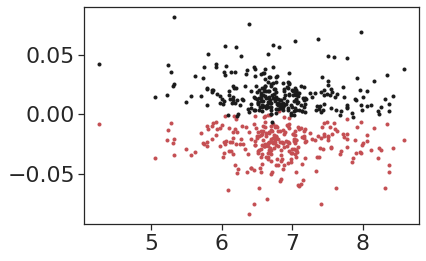

[0.3639676160038142, -0.05475293286011593]
[8.77195502619579e-05, -0.23345724613214777]


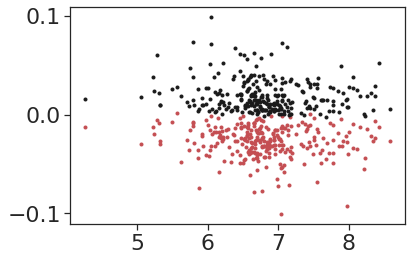

[0.09478641701190696, -0.1005810953183772]
[0.034338755527358614, -0.12720070372833736]


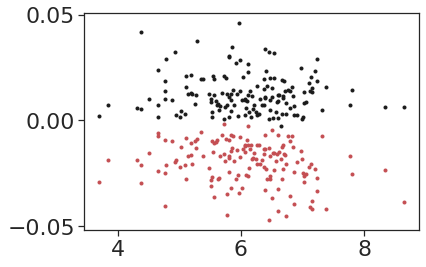

[0.01381662547969484, -0.2013205151460185]
[0.857810454017774, -0.014801378559767821]


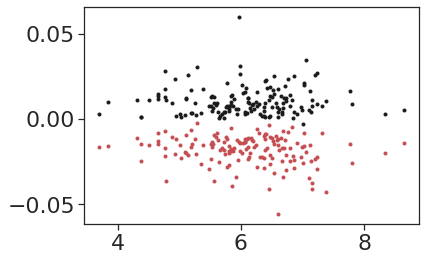

[0.038398666012047694, -0.16982405224015962]
[0.43526710686211045, 0.06439325231271541]


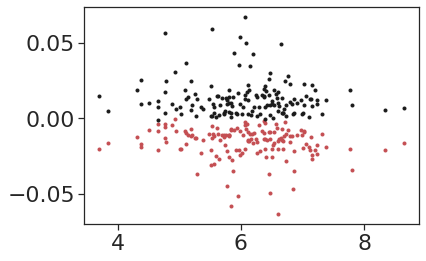

[0.048966746969201246, -0.1615962270995828]
[0.7194978248078383, -0.02966442953020134]


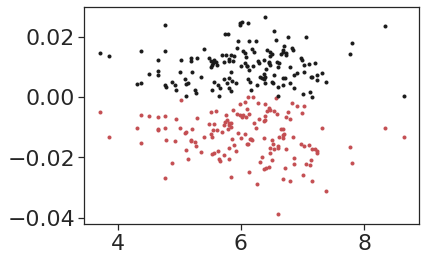

[0.02059285613569524, -0.1895555958643207]
[0.37813338339125424, 0.07271902775258479]


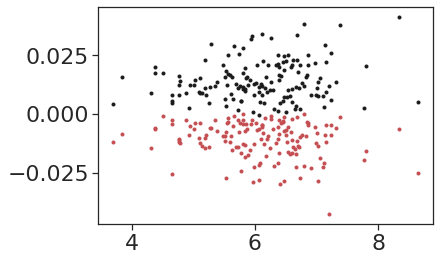

[0.04722832890785484, -0.16284055867948485]
[0.21436529188650558, 0.10231452929439508]


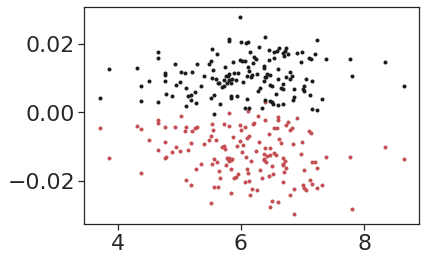

[0.002947641993631713, -0.24197714493016506]
[0.15300168992907293, 0.11765282060584074]


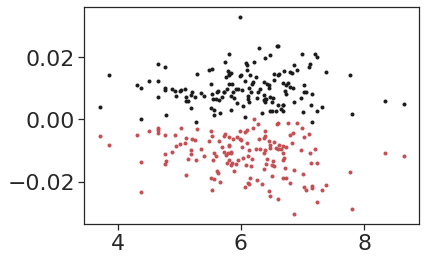

[0.0034584916599096835, -0.2380736441139126]
[0.5310247871181936, 0.05172138581534554]


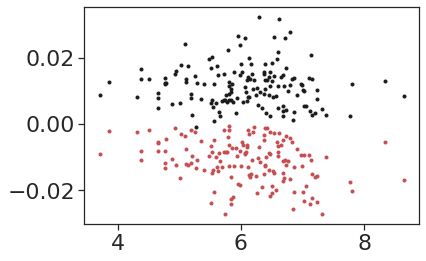

[0.0002083413619808418, -0.2993506257935788]
[0.3645460613681414, -0.07480863413749321]


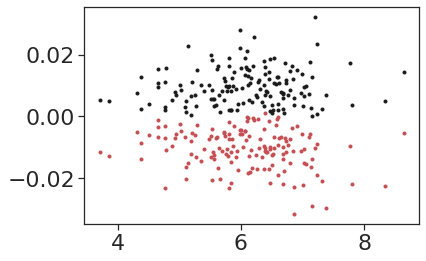

[0.01785490344638548, -0.1938327589334301]
[0.48253789510890843, 0.05796843823689461]


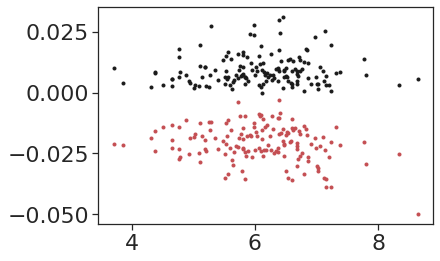

[0.022776905874561767, -0.1864828586976238]
[0.5196618710706529, 0.05315799020497007]


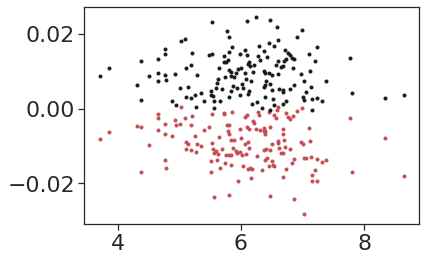

[0.017581879272020214, -0.1942898603301288]
[0.9578023119124108, 0.004371485579539271]


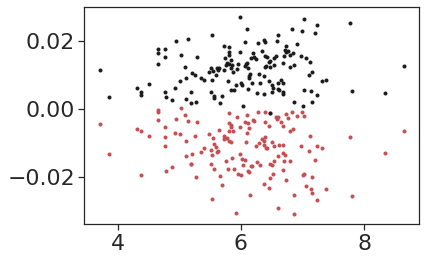

[0.041148068546087546, -0.16751677852348992]
[0.05725790501191861, 0.15612189370578633]


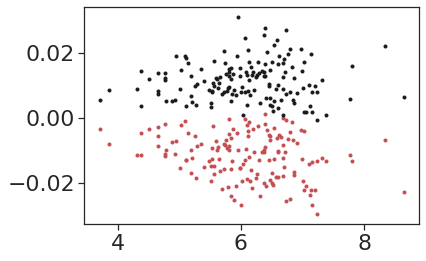

[0.006238520107608865, -0.2231053872664611]
[0.7945431817908879, 0.021512787955740978]


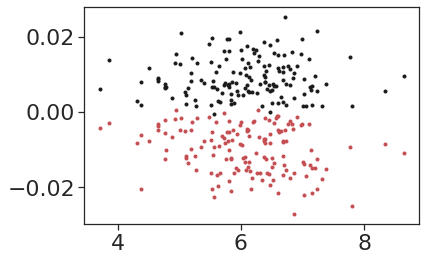

[0.009232973518392114, -0.2126174496644295]
[0.7935608606904115, 0.021617993832758933]


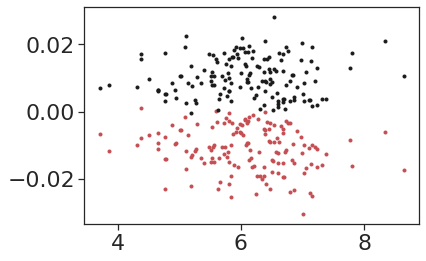

[0.027210204565259976, -0.180954108470887]
[0.9316246509383121, -0.007088699437692727]


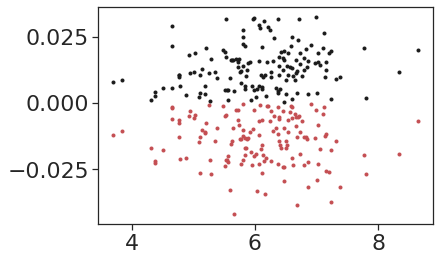

[0.2969718864267306, -0.08600761835661164]
[0.019512530333983313, 0.19118084527480497]


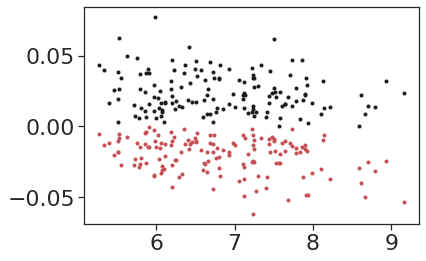

[0.00522377400046511, -0.23001166456190414]
[0.1517140206689225, -0.1192388150347527]


/groups/ahrens/home/weiz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


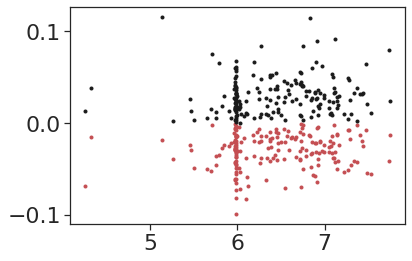

[0.30443320123959133, 0.0750939296246224]
[0.0416714219132493, 0.14831793205997448]


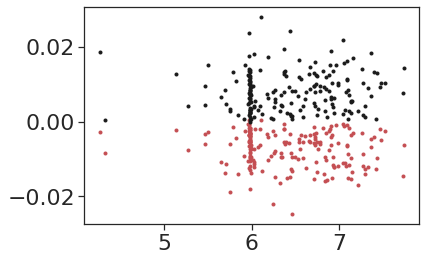

[0.02333494705413171, -0.1649286445920382]
[0.37394560019573486, 0.06503596099298167]


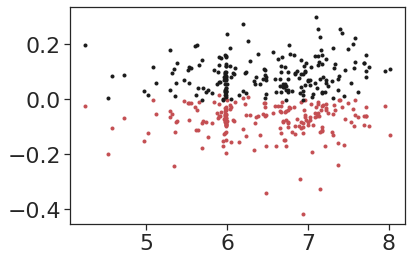

[0.7928099398905952, 0.018736119031617305]
[0.028043687610556162, 0.15574779636657202]


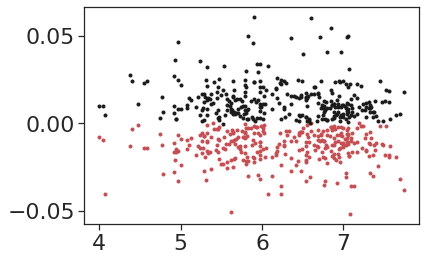

[0.8353382364694668, 0.011930975198858313]
[0.0378270437674869, -0.1187839305103149]


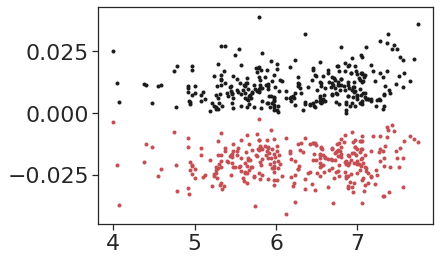

[0.09884971601678318, 0.09452578169090033]
[0.008630790000974784, 0.14990225918957323]


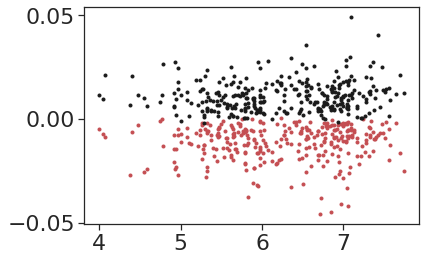

[0.38085074104145566, 0.05027050175012068]
[0.04902455947043587, 0.11262735884122434]


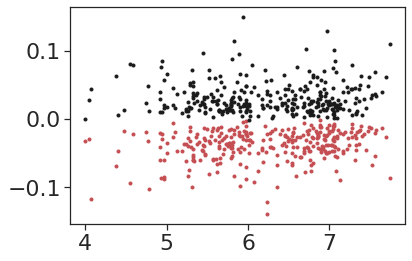

[0.00031367231570740377, 0.2046647547789341]
[0.5059462578724934, 0.038167184425967754]


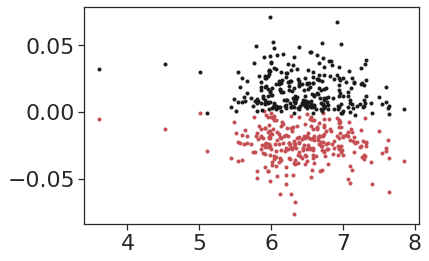

[0.13057985197423888, -0.09139153018756328]
[0.02737077358525707, -0.13305221029528788]


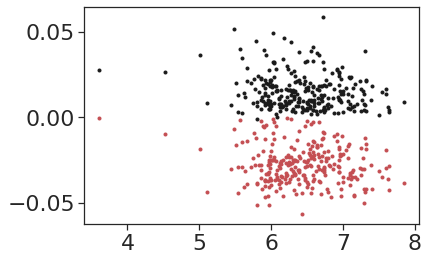

[0.2520600341561686, -0.06930040639359879]
[0.01638031874038041, -0.14464218842054768]


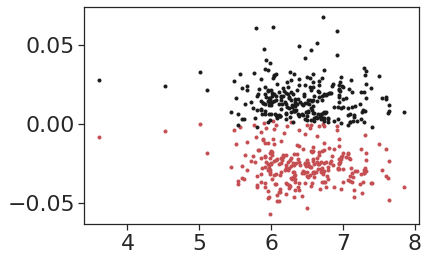

[0.04003071916291326, -0.12391340348716957]
[0.05290169427821492, -0.1168605157730876]


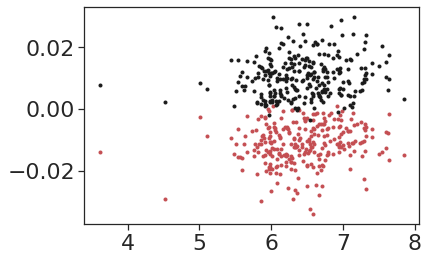

[0.01748888545037688, 0.14320714532597828]
[0.028038439645471824, 0.13248788695532454]


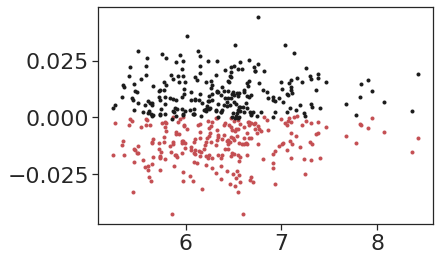

[0.009980012106870972, 0.16706841500814013]
[0.5041030253557153, 0.04360426856861603]


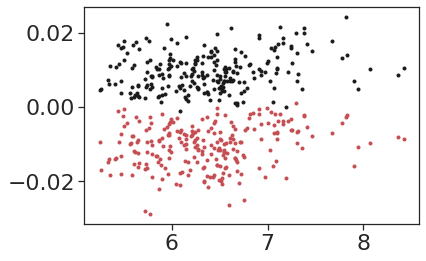

[0.0021729257731201244, 0.19819564813696344]
[0.008182249279885496, 0.17140891971463548]


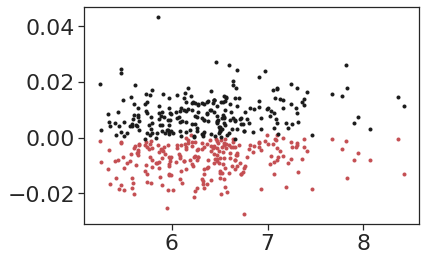

[0.005594336695290148, 0.17945891079023327]
[0.0021947331326124466, 0.19800634263574557]


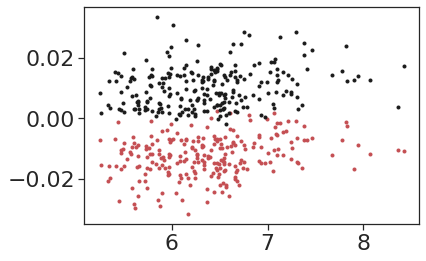

[0.00010934543453351867, 0.24866539621641406]
[0.0012091577188582735, 0.20902482426139304]


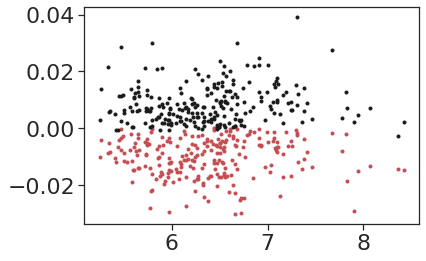

[0.34619156493879977, 0.06145667878822845]
[0.028150875778547357, 0.14261645443416585]


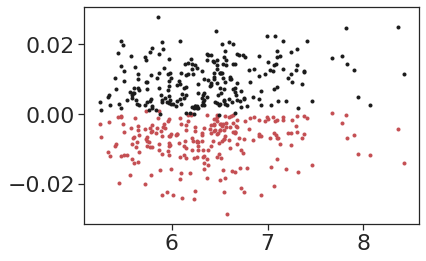

[0.052038050825752594, 0.12636142206292517]
[0.0005786336906074608, 0.22192464198723902]


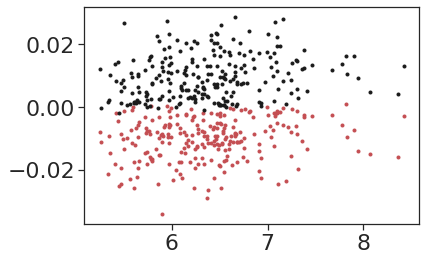

[0.006853595970255492, 0.17520133992236672]
[0.0008899602956531639, 0.21448042851553836]


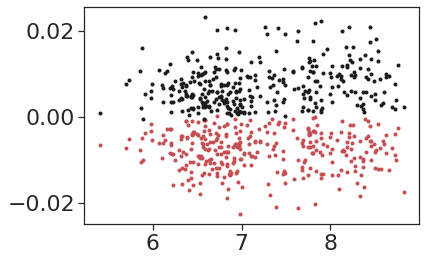

[0.49301147363847864, -0.038218623481781386]
[0.0006864477795206633, 0.18765455619944788]


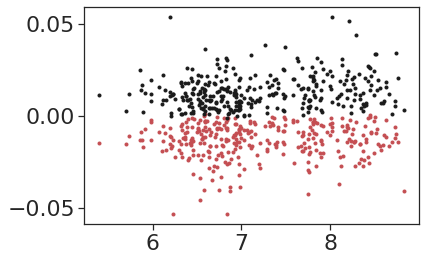

[0.5579831545890088, 0.03266421458371923]
[0.0013420282608358788, 0.177427782629021]


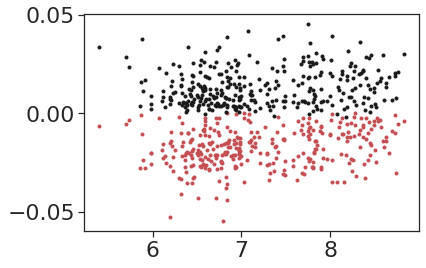

[3.697136001280434e-05, 0.22707840491122228]
[0.012974845494379226, 0.13789844142785324]


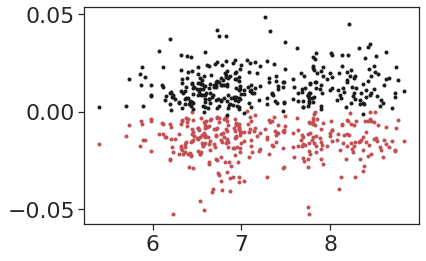

[0.8618064458077571, 0.009708131565716706]
[0.04405322500829817, 0.11194658340169178]


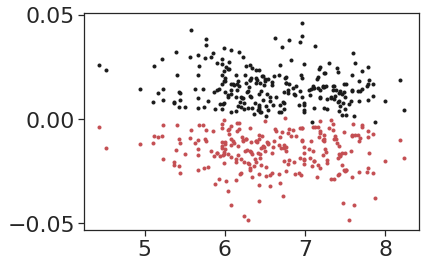

[0.34526518741238854, -0.06042808584609982]
[0.040393044394334464, -0.13078880478914073]


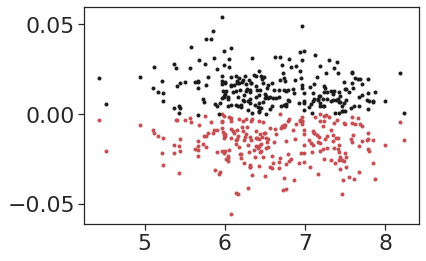

[0.36070463621120274, -0.05852410277720071]
[0.005798129077155903, -0.17543366096163995]


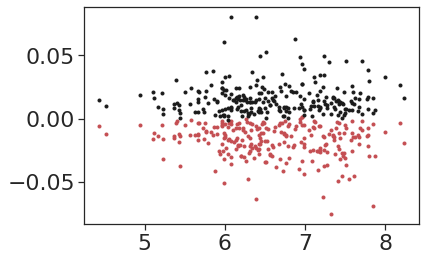

[0.022929516185475843, -0.1449949206294217]
[0.6616611084920025, 0.028039012306768352]


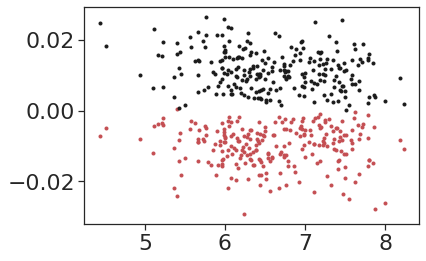

[0.9809930541472056, 0.0015267332483043714]
[0.0022196954834428468, -0.19417322336393977]


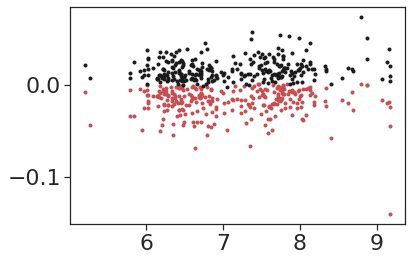

[0.374439525269354, 0.05426533819241538]
[0.048201795132911875, 0.12035129273225816]


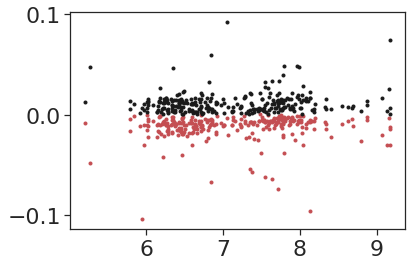

[0.010833619338170047, 0.15484955593050354]
[0.11549050509239685, 0.0960138151567389]


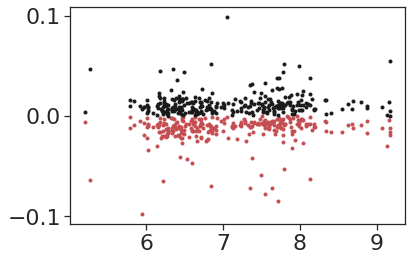

[0.010790177184617744, 0.1549336906008465]
[0.14104113699583035, 0.08981406542689961]


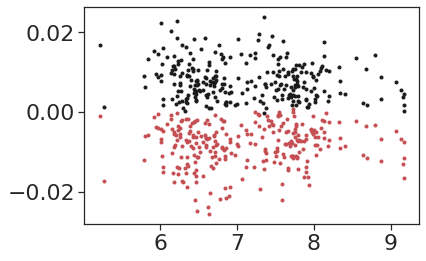

[0.4478935598265321, 0.04637740801199833]
[0.024685593229231334, -0.13669658629671796]


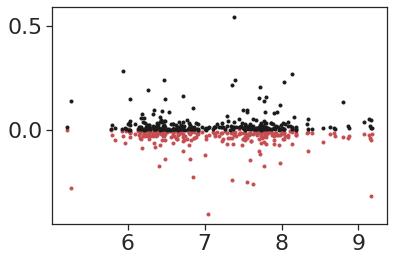

[0.0013246220875646325, -0.1944245539109666]
[0.25037214217491427, 0.07019239709125714]


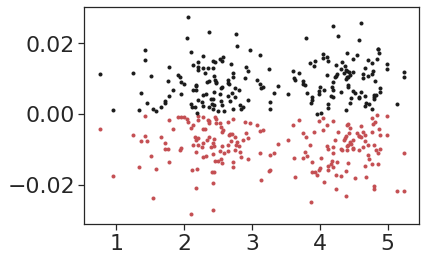

[0.10642705103701289, -0.11336692793181191]
[0.03559543764098128, 0.14723763348905586]


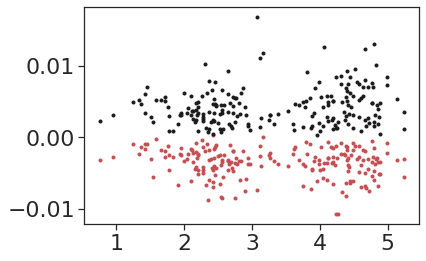

[0.022978401949305824, -0.15915923981030594]
[0.05885793549213131, 0.1325045409248645]


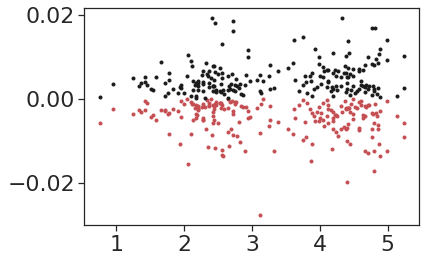

[0.005764639927908373, -0.19266949841332667]
[0.026402126480738825, 0.15545723756281318]


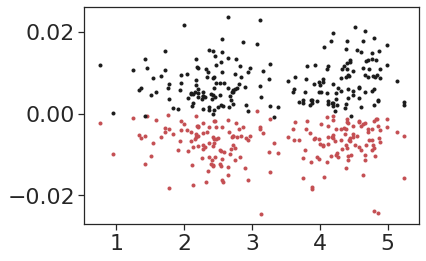

[0.8078304497919534, 0.01713324522407786]
[0.029318240444750995, 0.15261606745305356]


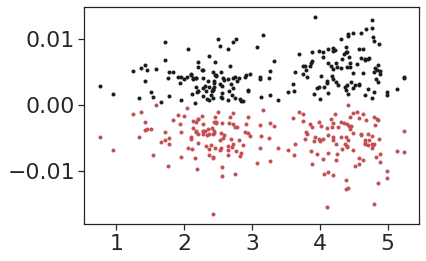

[0.017647958498789404, -0.16600349138814485]
[2.2191184451967116e-05, 0.29225887158900565]


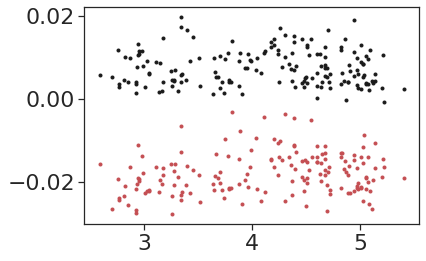

[0.012718930104099543, 0.19186985285557376]
[0.48976684032072193, -0.05364925263589474]


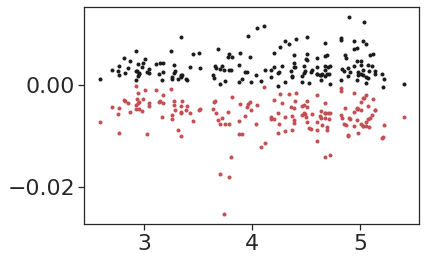

[0.0007898166398553313, -0.2565157090721348]
[0.5245412349940466, 0.04943536426723898]


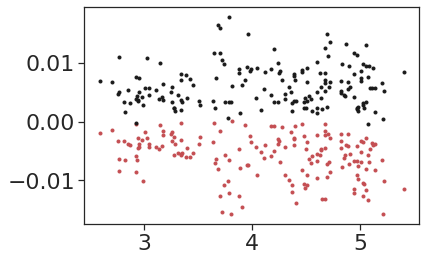

[0.00021779670407975335, -0.2815712615344122]
[0.22762007083660277, 0.09357869215077876]


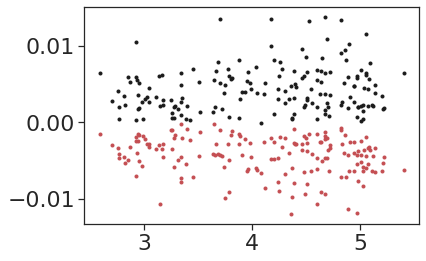

[0.006796644446317921, -0.2080850977672719]
[0.14551223768020025, 0.11278288731075467]


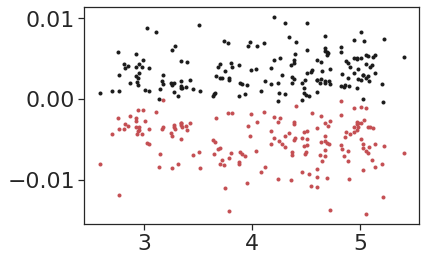

[0.0446858100914918, -0.15510905492480806]
[0.01987434486497639, 0.17954201487135624]


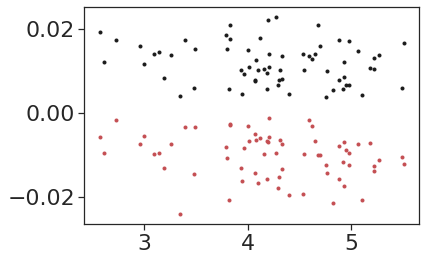

[0.030906115815435304, -0.2639476414717855]
[0.08976438329773129, -0.20891531646579942]


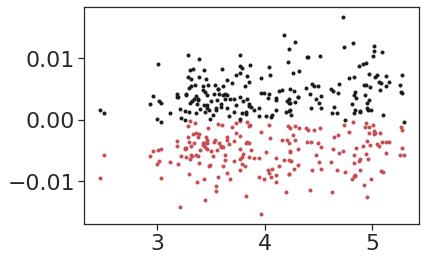

[0.39746656302472116, 0.06030759859905589]
[0.002494636452654546, 0.2132373991167961]


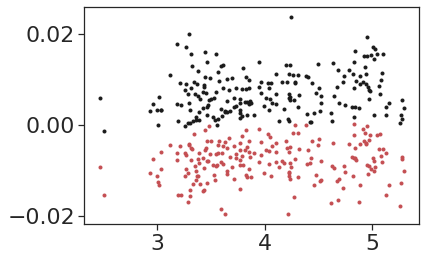

[0.10642745900747837, 0.11479061976549412]
[0.004756314707433953, 0.19936652961778592]


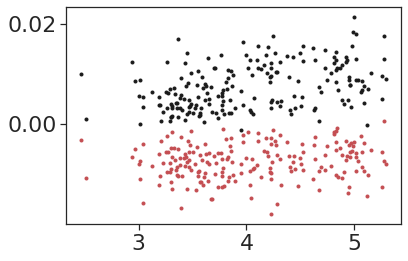

[0.0686404794831554, 0.12934368813765798]
[5.888761790297114e-09, 0.3979046748895995]


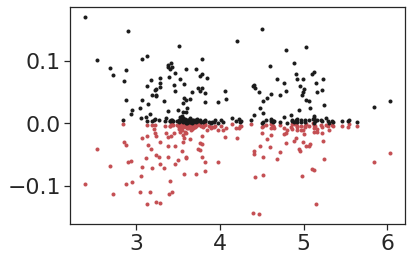

[0.0028033373200962324, 0.20012674130321187]
[0.00629188466689147, -0.18326570091275973]


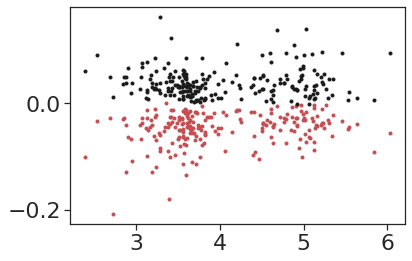

[0.014782931482663993, 0.16379423438246968]
[0.4583491669865125, -0.05013619131266189]


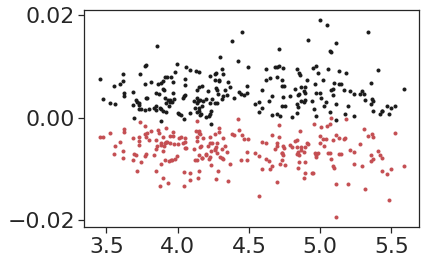

[0.02222857419448574, -0.15138147390290552]
[0.286849497222111, 0.07083591093039526]


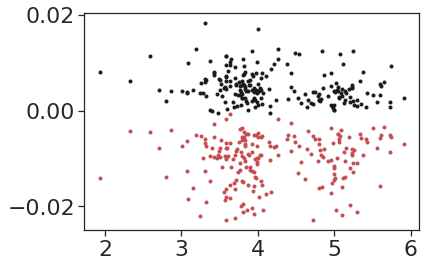

[0.22462062320782036, 0.08560153320460995]
[0.00048523151826776185, -0.24269188727044252]


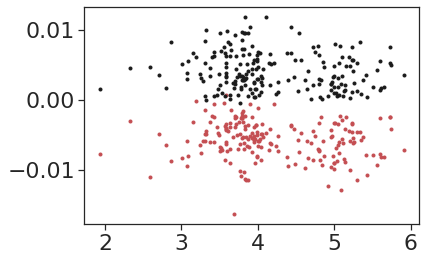

[0.021642847556345365, -0.1611285005637626]
[0.048394604886593764, -0.13872575318963368]


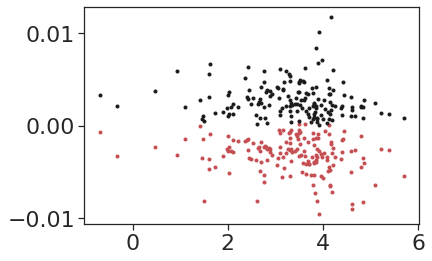

[0.008982548842723261, -0.20659183186052069]
[0.0729154774300715, -0.14262001433006927]


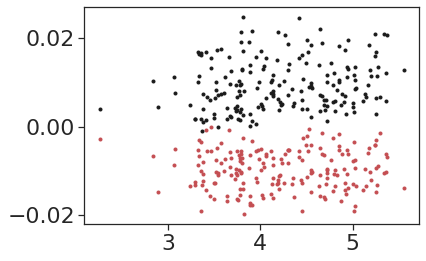

[0.9346325595214857, -0.005989668761782293]
[0.010768683434652716, 0.1846299868344509]


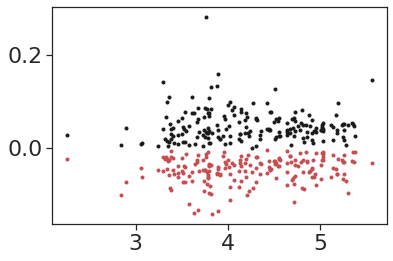

[0.0406141022934149, 0.14869197426375713]
[0.3678022176437974, 0.06569915189369585]


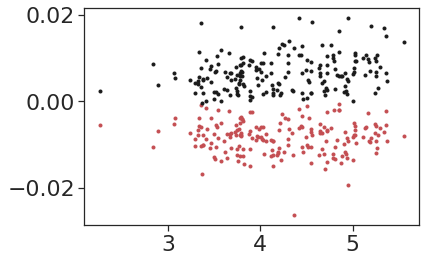

[0.5872309078955884, -0.03962874026252368]
[0.0006937538470390493, 0.24396506099454573]


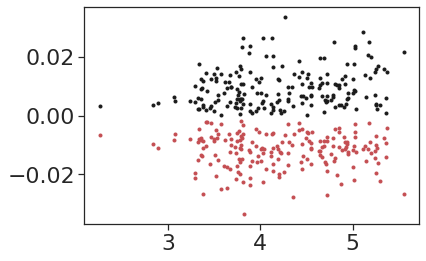

[0.5414815203903957, -0.044567789456188465]
[0.00992511694119089, 0.18664374723895252]


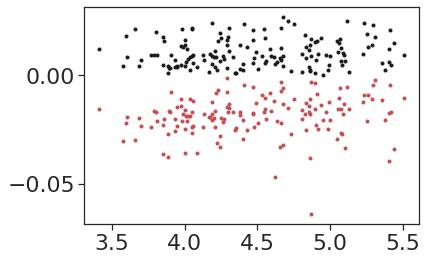

[0.002553460760808143, 0.24462420552024539]
[0.24855456417344488, 0.09479354637983911]


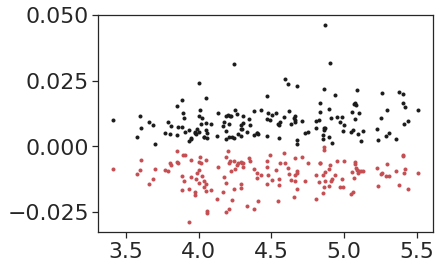

[0.9671554491124912, 0.003390372905462465]
[0.0078062297450622875, 0.21644517534112626]


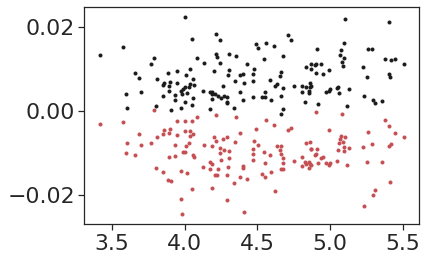

[0.43511241974121573, -0.06419663096137605]
[0.025778076123818053, 0.18204009067069649]


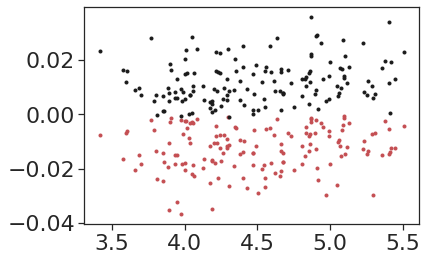

[0.07893039026447732, 0.14390861816080716]
[0.0035211003028134905, 0.23684785990488466]


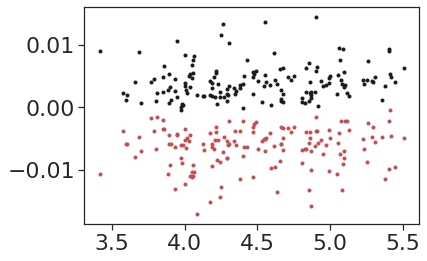

[0.23975116795287868, 0.09657140317347439]
[0.03150481764564977, 0.1757002533445931]


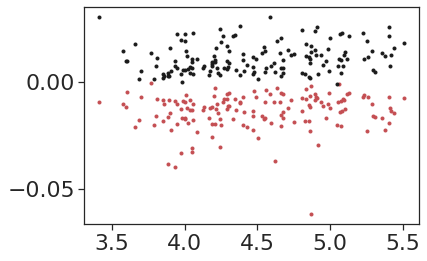

[0.08097040926480695, 0.1429485754922441]
[0.002970430122385027, 0.24099382194764213]


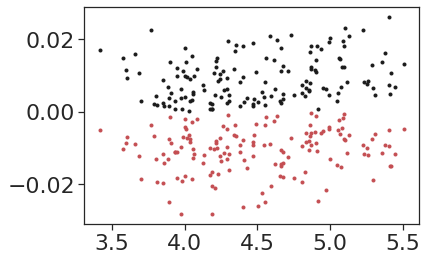

[0.10284666147275759, 0.13370727587892794]
[0.000834256937732671, 0.26997999911107157]


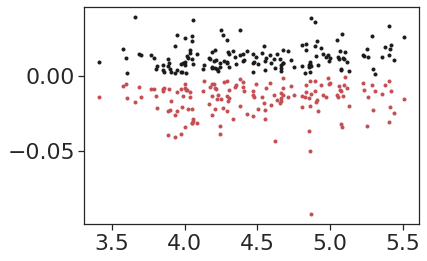

[0.25966799993320244, 0.092610338237255]
[0.01814639099209567, 0.19270723143250815]


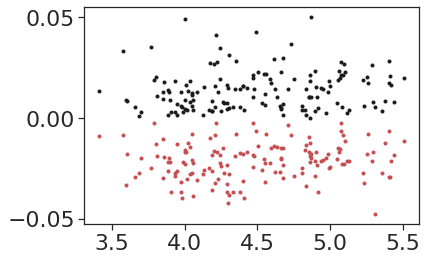

[0.09635736506290335, 0.13627094537535]
[0.03759896273629395, 0.1699506644739766]


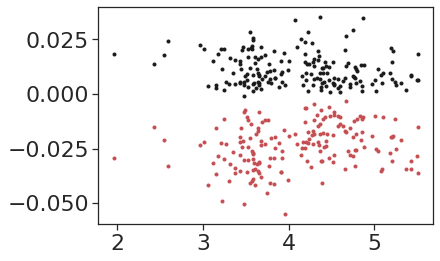

[0.0006097882780896678, 0.2544330476025317]
[0.028029835337943718, -0.164696482393883]


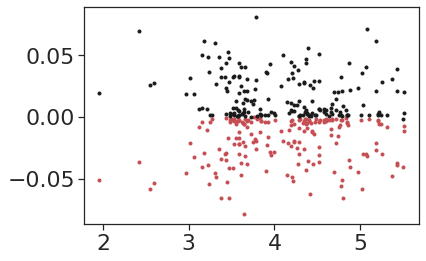

[0.11263056072782045, 0.11932709811060198]
[0.008971797954694232, -0.19534773371180167]


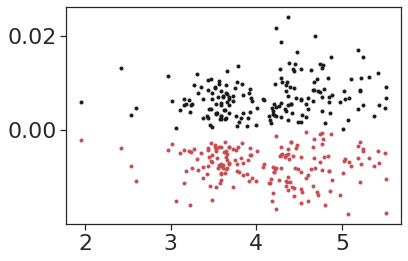

[0.225063837613444, -0.09138456202542958]
[0.00450029193670698, 0.2119936718624492]


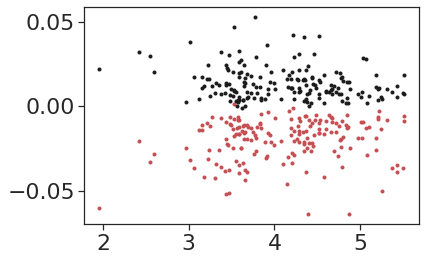

[0.023114317539490673, 0.1702139204131376]
[0.022319612950476558, -0.17119910120870832]


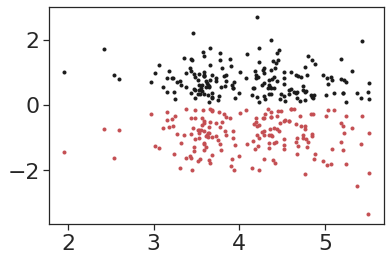

[0.884382772025709, -0.010976360980457034]
[0.03412713535593535, -0.15890242773656307]


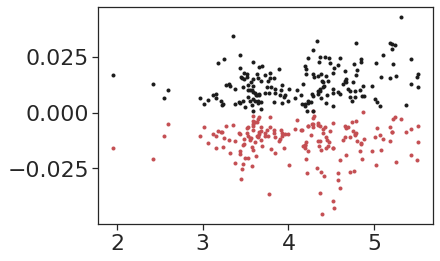

[0.8767763640033587, -0.011704075520597833]
[0.00032781307733457574, 0.26625096150879485]


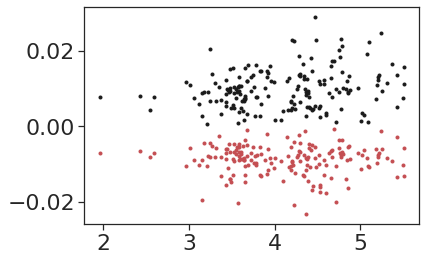

[0.48864712052188297, -0.05223479645803034]
[0.008555439743604959, 0.19653505743518926]


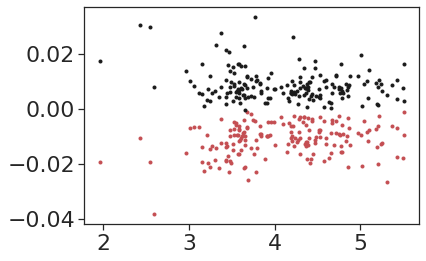

[0.005858316171045779, 0.20577618096686026]
[0.14188525424441645, -0.11053281684042092]


20

In [19]:
k_ = gaussKernel(sigma=5)
k_sub = gaussKernel(sigma=11)
ave_low_list = []
ave_high_list = []
p_mat = []
fish_id = []
sub_low_list = []
sub_high_list = []

for ind, row in dat_xls_file.iterrows():    
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    task_period = _['task_period'] 
    swim_starts = _['swim_starts'] 
    trial_valid = np.ones(len(swim_starts)).astype('bool')
    swim_power = np.log((_['r_swim']+_['l_swim'])[:, t_pre:t_pre+t_sig].sum(axis=-1))
    visu=-_['visu']
    visu[visu<0]=0
    visu=np.log(visu[:, t_pre:t_pre+t_sig].sum(axis=-1))
    for n, n_swim in enumerate(swim_starts[:-1]):        
        # examine the swim with short inter-swim-interval
        if swim_starts[n+1] - n_swim < t_sig:    
            trial_valid[n] = False
    
               
    _ = np.load(f'../Analysis/swim_voltr/{folder}_{fish}_swim_voltr_dat.npz')
    # trial_valid = _['trial_valid']
    sub_swim = _['sub_swim']
    spk_swim = _['spk_swim']    
    
    for n_cell in range(sub_swim.shape[0]):
        sub_list = sub_swim[n_cell]
        tmp = []
        for n_spk in sub_list:
            tmp.append(smooth(n_spk, k_sub))
        sub_list = np.array(tmp)
        sub_list = sub_list - sub_list[:, (t_pre-60):t_pre].mean(axis=-1, keepdims=True)        
        spk_list = spk_swim[n_cell]
        tmp = []
        for n_spk in spk_list:
            tmp.append(smooth(n_spk, k_))
        spk_list = np.array(tmp)
        non_trial = np.isnan(spk_list).sum(axis=-1)==0
        trial_valid = trial_valid & non_trial
        gain_stat = np.zeros(t_pre+t_post)
        for ntime in range(-t_pre, t_post):
            val, pval= ranksums(spk_list[(task_period==1) & trial_valid, t_pre+ntime], 
                                spk_list[(task_period==2) & trial_valid, t_pre+ntime])
            gain_stat[t_pre+ntime] = np.sign(-val) * pval
        p_mat.append(gain_stat)
        if (gain_stat[t_pre:t_pre+300]<0.05).sum()>30:
#             _, pmin = spearmanr(swim_power[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1))
#             _, pmax = spearmanr(swim_power[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1))
#             if pmin>0.05 and pmax>0.05:
#                 continue
#             plt.figure()
#             plt.plot(swim_power[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1), '.r')
#             plt.plot(swim_power[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1), '.k')
#             plt.show()
#             print([pmin, pmax])
            valmin, pmin = spearmanr(visu[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1))
            valmax, pmax = spearmanr(visu[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1))
            if pmin>0.05 and pmax>0.05:
                continue
            plt.figure()
            plt.plot(visu[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1), '.r')
            plt.plot(visu[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1), '.k')
            plt.show()
            print([pmin, valmin])
            print([pmax, valmax])
        ave_low_list.append(spk_list[(task_period==1) & trial_valid].mean(axis=0)*300)
        ave_high_list.append(spk_list[(task_period==2) & trial_valid].mean(axis=0)*300)
        sub_low_list.append(sub_list[(task_period==1) & trial_valid].mean(axis=0)*100)
        sub_high_list.append(sub_list[(task_period==2) & trial_valid].mean(axis=0)*100)
        fish_id.append(folder+fish[:5])

# print number of fish
len(np.unique(np.array(fish_id)))

In [35]:
k_ = gaussKernel(sigma=11)
k_sub = gaussKernel(sigma=11)
ave_low_list = []
ave_high_list = []
p_mat = []
fish_id = []
sub_low_list = []
sub_high_list = []
corr_ = []

for ind, row in dat_xls_file.iterrows():    
    folder = row['folder']
    fish = row['fish']
    task_type = row['task']
    
    _ = np.load(f'../Analysis/swim_power/{folder}_{fish}_swim_dat.npz')
    task_period = _['task_period'] 
    swim_starts = _['swim_starts'] 
    trial_valid = np.ones(len(swim_starts)).astype('bool')
    swim_power = (_['r_swim']+_['l_swim'])[:, t_pre:t_pre+t_sig].sum(axis=-1)
    visu=-_['visu']
    visu[visu<0]=0
    visu=visu[:, t_pre:t_pre+t_sig].max(axis=-1)
    for n, n_swim in enumerate(swim_starts[:-1]):        
        # examine the swim with short inter-swim-interval
        if swim_starts[n+1] - n_swim < t_sig:    
            trial_valid[n] = False
    
               
    _ = np.load(f'../Analysis/swim_voltr/{folder}_{fish}_swim_voltr_dat.npz')
    # trial_valid = _['trial_valid']
    sub_swim = _['sub_swim']
    spk_swim = _['spk_swim']    
    
    for n_cell in range(sub_swim.shape[0]):
        sub_list = sub_swim[n_cell]
        tmp = []
        for n_spk in sub_list:
            tmp.append(smooth(n_spk, k_sub))
        sub_list = np.array(tmp)
        sub_list = sub_list - sub_list[:, (t_pre-60):t_pre].mean(axis=-1, keepdims=True)        
        spk_list = spk_swim[n_cell]
        tmp = []
        for n_spk in spk_list:
            tmp.append(smooth(n_spk, k_))
        spk_list = np.array(tmp)
        non_trial = np.isnan(spk_list).sum(axis=-1)==0
        trial_valid = trial_valid & non_trial
        gain_stat = np.zeros(t_pre+t_post)
        for ntime in range(-t_pre, t_post):
            val, pval= ranksums(spk_list[(task_period==1) & trial_valid, t_pre+ntime], 
                                spk_list[(task_period==2) & trial_valid, t_pre+ntime])
            gain_stat[t_pre+ntime] = np.sign(-val) * pval
        p_mat.append(gain_stat)
        vismin, _ = spearmanr(visu[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1))
        vismax, _ = spearmanr(visu[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1))
        swmmin, _ = spearmanr(swim_power[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1))
        swmmax, _ = spearmanr(swim_power[trial_valid], sub_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1))
        corr_.append([vismin, vismax, swmmin, swmmax])
        
#         vismin, _ = spearmanr(visu[trial_valid], spk_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1))
#         vismax, _ = spearmanr(visu[trial_valid], spk_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1))
#         swmmin, _ = spearmanr(swim_power[trial_valid], spk_list[trial_valid,t_pre-30:t_pre+300].min(axis=-1))
#         swmmax, _ = spearmanr(swim_power[trial_valid], spk_list[trial_valid,t_pre-30:t_pre+300].max(axis=-1))
#         corr_.append([vismin, vismax, swmmin, swmmax])
        
        ave_low_list.append(spk_list[(task_period==1) & trial_valid].mean(axis=0)*300)
        ave_high_list.append(spk_list[(task_period==2) & trial_valid].mean(axis=0)*300)
        sub_low_list.append(sub_list[(task_period==1) & trial_valid].mean(axis=0)*100)
        sub_high_list.append(sub_list[(task_period==2) & trial_valid].mean(axis=0)*100)
        fish_id.append(folder+fish[:5])

# print number of fish
len(np.unique(np.array(fish_id)))

21

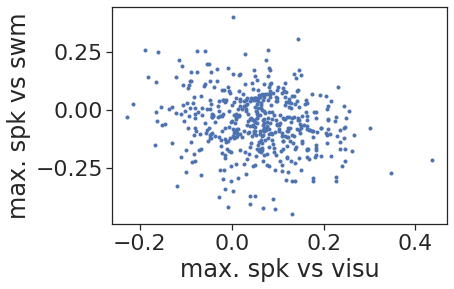

In [36]:
corr_ = np.array(corr_)
plt.plot(corr_[:,1], corr_[:,3], '.')
plt.xlabel('max. spk vs visu')
plt.ylabel('max. spk vs swm')
plt.show()

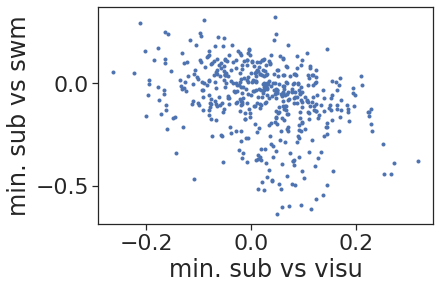

In [38]:
corr_ = np.array(corr_)
plt.plot(corr_[:,0], corr_[:,2], '.')
plt.xlabel('min. sub vs visu')
plt.ylabel('min. sub vs swm')
plt.show()